<a href="https://colab.research.google.com/github/Muhaiminul-Hasan/Learning-TensorFlow/blob/main/03_Learning_Tensorflow_CNN_on_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset  = dataset['train']
test_dataset   = dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteGJ6DSL/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteGJ6DSL/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = metadata.features['label'].names
# for index, class_name in enumerate(class_names):
#   print(index, ": ",class_name)

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples  = metadata.splits['test'].num_examples

# print("train_examples    test_examples\n", num_train_examples, "            ", num_test_examples)

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# Apply normalize function to each element of the dataset
train_dataset = train_dataset.map(normalize)
test_dataset  = test_dataset.map(normalize)

# Cache the dataset to train faster
train_dataset = train_dataset.cache()
test_dataset  = test_dataset.cache()

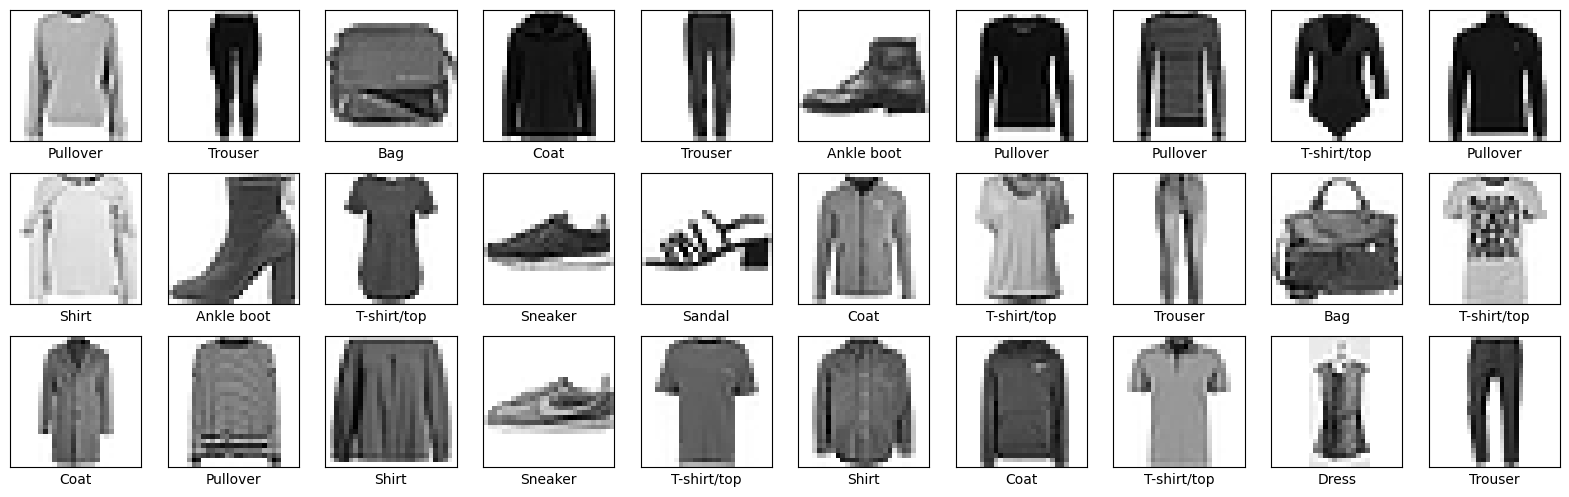

In [ ]:
plt.figure(figsize=(20, 6))
for i, (image, label) in enumerate(train_dataset.take(30)):
  plt.subplot(3, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image = image.numpy().reshape(28, 28)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()

In [ ]:
batch_size = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(batch_size)
test_dataset  = test_dataset.cache().batch(batch_size)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',
                           activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',
                           activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              # optimizer=tf.keras.optimizers.Adam(0.1),
              metrics=['accuracy'])

In [ ]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/batch_size))

1875/1875 [==============================] - 22s 4ms/step - loss: 0.3931 - accuracy: 0.8588


In [ ]:
test_loss, test_accuracy = model.evaluate(train_dataset, steps=math.ceil(num_test_examples/batch_size))

313/313 [==============================] - 1s 3ms/step - loss: 0.2785 - accuracy: 0.8943


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

print(test_images.shape)
print(test_labels.shape)
print(predictions.shape)

1/1 [==============================] - 0s 139ms/step
(32, 28, 28, 1)
(32,)
(32, 10)


In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, image = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  color = 'blue' if predicted_label == true_label else 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100 * np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color="gray")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

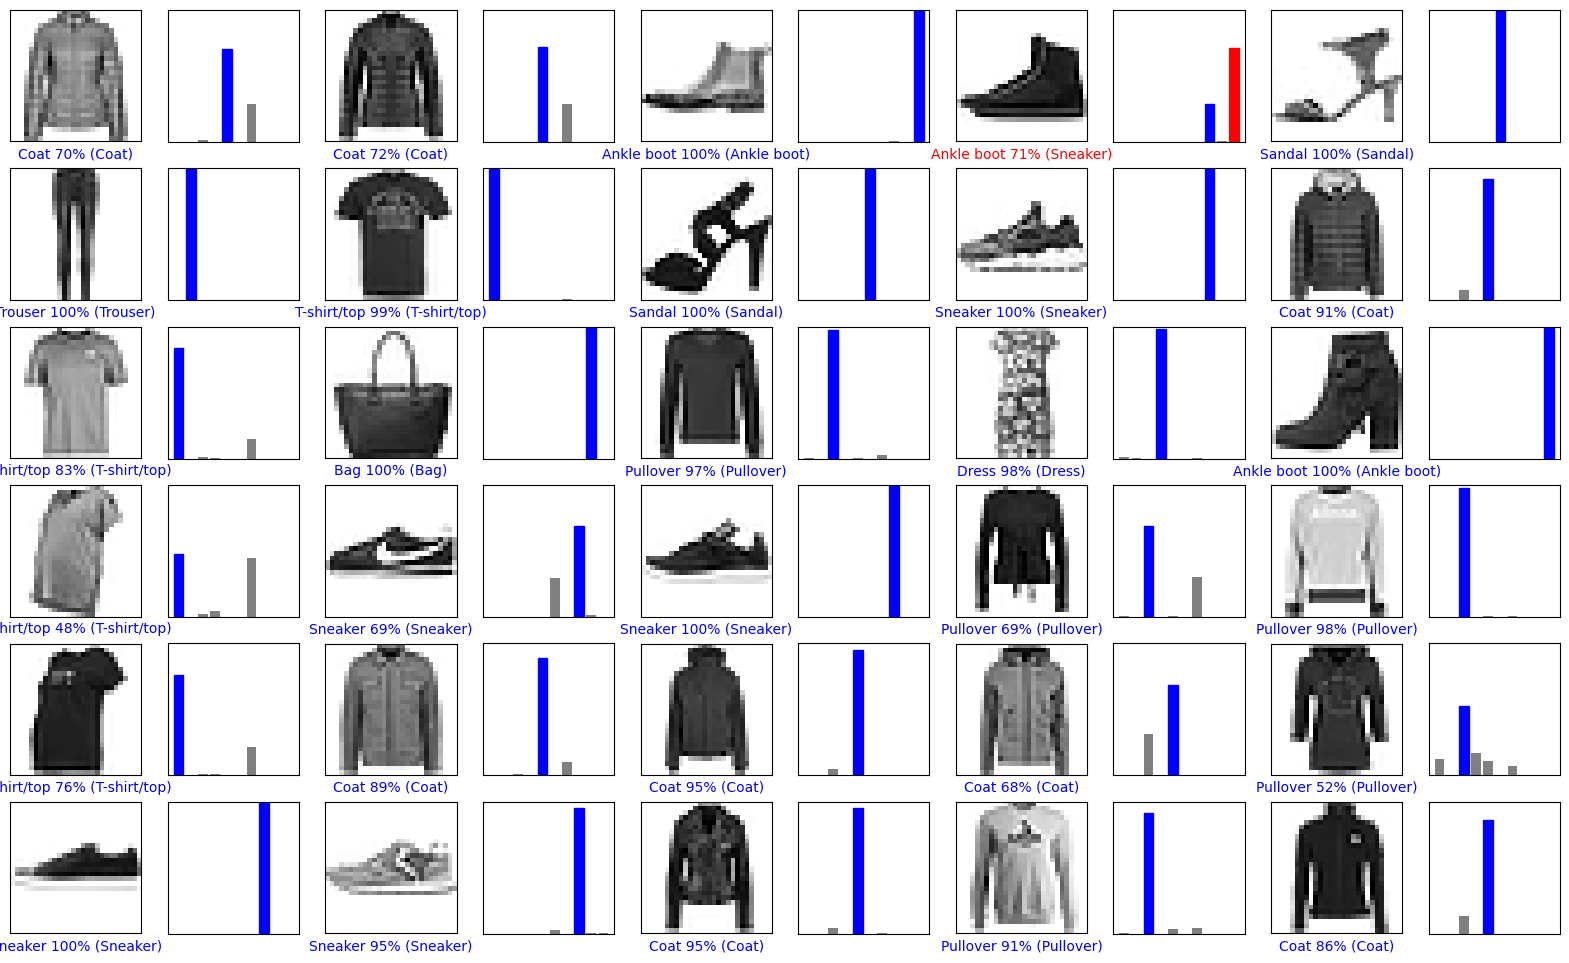

In [ ]:
num_rows = 6
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(20, 2*num_rows))
for i in range (num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

1/1 [==============================] - 0s 120ms/step


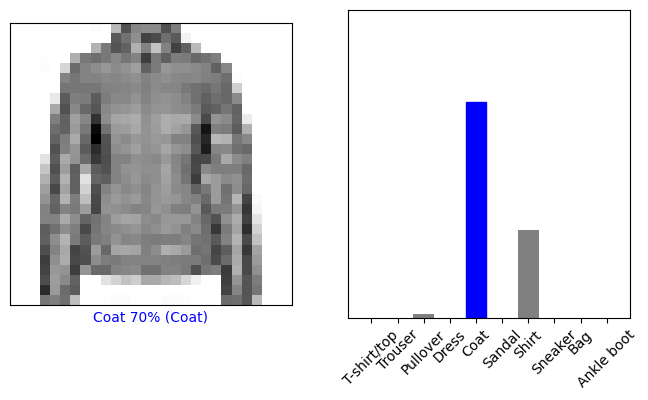

In [ ]:
# Grab an image from the test dataset
img = test_images[0]
img = np.array([img])   # Add the image to a batch where it's the only member.

predictions_single = model.predict(img)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(0, predictions_single, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)